In [326]:

import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.preprocessing import PolynomialFeatures, StandardScaler





In [232]:
# TO FIX:
# TODO: Change Variable Names from X, Y, etc to their actual values
# TODO: Get rid of multi-colinearity with X2, X3
# TODO: Try out all possible combinations for interaction terms
# TODO: email prof question about interaction vs not (if interactoin term is in model then both regular terms must be even if they're not significant)



In [241]:
## Variables MAP!
"""
Y SO2 content of air in micrograms per cubic metre
X1 Average annual temperature in oF
X2 Number of manufacturing enterprises employing 20 or more workers
X3 Population size (1970 census); in thousands
X4 Average annual wind speed in miles per hour
X5 Average annual precipitation in inches
X6 Average annual of days with precipitation per year
"""

In [353]:

df = pd.read_csv('data.csv')

# standardize
df['Y'] = np.log(df['Y'])
# numerical_cols = df.select_dtypes(include=['int', 'float']).columns
# scaler = StandardScaler()
# df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

print(df.head())


df['NE'] = (df['Region'] == 'NE').astype(int)
df['MW'] = (df['Region'] == 'MW').astype(int)
df['S'] = (df['Region'] == 'S').astype(int)
df['W'] = (df['Region'] == 'W').astype(int)

all_X = df[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'NE']]
y = df['Y']

df.head()



          Cities         Y    X1   X2   X3   X4     X5   X6 Region
0        Phoenix  2.302585  70.3  213  582  6.0   7.05   36      W
1    Little Rock  2.564949  61.0   91  132  8.2  48.52  100      S
2  San Francisco  2.484907  56.7  453  716  8.7  20.66   67      W
3         Denver  2.833213  51.9  454  515  9.0  12.95   86      W
4       Hartford  4.025352  49.1  412  158  9.0  43.37  127     NE


,Cities,Y,X1,X2,X3,X4,X5,X6,Region,NE,MW,S,W
0,Phoenix,2.302585,70.3,213,582,6.0,7.05,36,W,0,0,0,1
1,Little Rock,2.564949,61.0,91,132,8.2,48.52,100,S,0,0,1,0
2,San Francisco,2.484907,56.7,453,716,8.7,20.66,67,W,0,0,0,1
3,Denver,2.833213,51.9,454,515,9.0,12.95,86,W,0,0,0,1
4,Hartford,4.025352,49.1,412,158,9.0,43.37,127,NE,1,0,0,0


In [ ]:
#Testing LR with sklearn

model = LinearRegression()




model.fit(X, y)

print(model.coef_)
print(model.intercept_)

y_pred = model.predict(X)
r_squared = r2_score(y, y_pred)
print("R-squared:", r_squared)



In [354]:
def fit_lm(X, y):
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    print(model.summary())
    return model

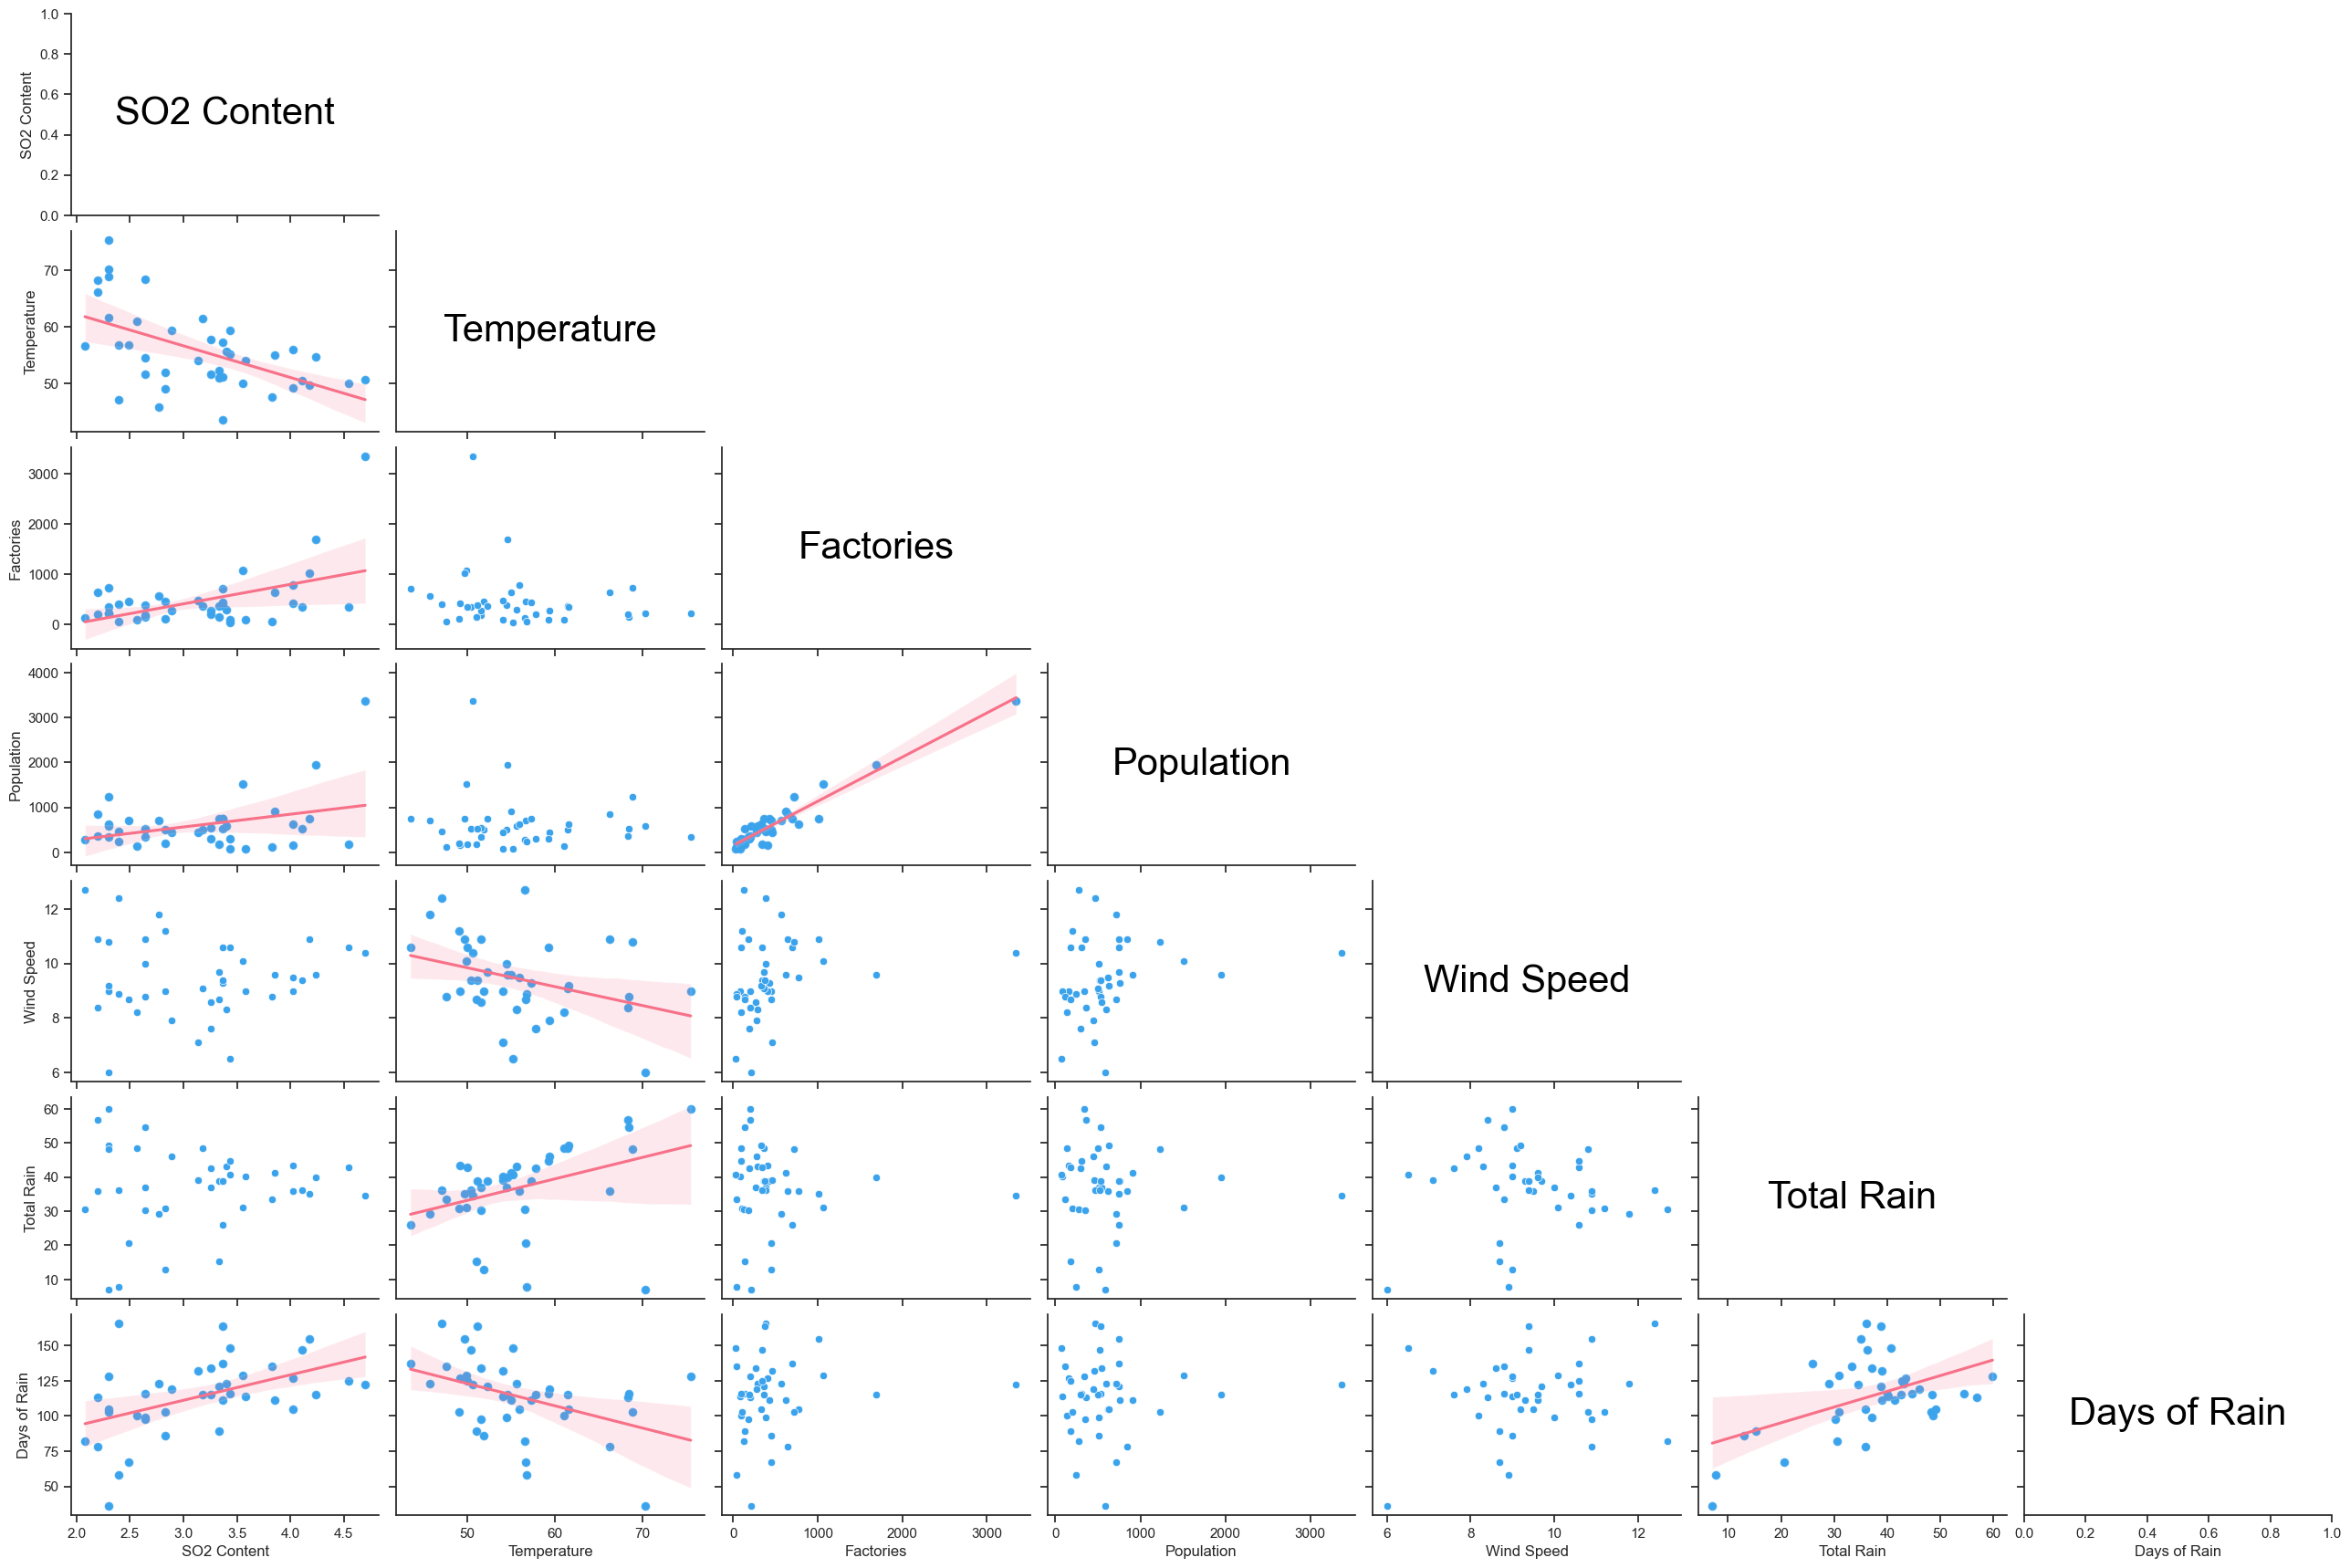

In [356]:
# Pairplot code

"""
Y SO2 content of air in micrograms per cubic metre
X1 Average annual temperature in F
X2 Number of manufacturing enterprises employing 20 or more workers
X3 Population size (1970 census); in thousands
X4 Average annual wind speed in miles per hour
X5 Average annual precipitation in inches
X6 Average annual of days with precipitation per year
"""

df_s = df[['Y', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6']]
df_s = df_s.rename(columns={'Y':'SO2 Content','X1': 'Temperature', 'X2': 'Factories', 'X3': 'Population', 'X4': 'Wind Speed', 'X5': 'Total Rain', 'X6': 'Days of Rain'})


palette = sns.color_palette("husl", 3) 

# g = sns.pairplot(df_s, corner=True, kind="reg", plot_kws={'line_kws':{'color':'red'}},  diag_kind='None')
g = sns.pairplot(df_s, corner=True,  diag_kind='None', plot_kws={'color': palette[2]}, aspect = 1.5)
for i, var in enumerate(df_s.columns):
    g.axes[i, i].annotate(var, (0.5, 0.5), xycoords='axes fraction',
                                  ha='center', va='center', fontsize=30,
                                  color='black', rotation=0)
    
for i, var1 in enumerate(df_s.columns):
    for j, var2 in enumerate(df_s.columns):
        if i != j:  # Exclude identical pairs
            if i < j:  # Exclude upper triangle
                continue
            corr = df_s[var1].corr(df_s[var2])
            if abs(corr) > 0.25:  # Check correlation threshold
                # Add regression line with CI
                sns.regplot(x=var2, y=var1, data=df_s, ax=g.axes[i, j], color=palette[0], scatter_kws={'color': palette[2]})


plt.show()


In [342]:
# Check for colliniearity X2, X3

X2 = df['X2']
X3 = df['X3']

model = fit_lm(X2, X3)
# R-squared : 0.913 -> High co-linearity, remove: which to remove? population

corr, p = pearsonr(X2, X3)
print(corr, p)

print("X5/X6", pearsonr(df['X5'], df['X6']))
print("X1/X5", pearsonr(df['X1'], df['X5']))
print("X1/X6", pearsonr(df['X1'], df['X6']))
print("X1/X4", pearsonr(df['X1'], df['X4']))


                            OLS Regression Results                            
Dep. Variable:                     X3   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     406.9
Date:                Thu, 14 Mar 2024   Prob (F-statistic):           3.07e-22
Time:                        12:14:29   Log-Likelihood:                -8.2268
No. Observations:                  41   AIC:                             20.45
Df Residuals:                      39   BIC:                             23.88
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.204e-18      0.047   -1.1e-16      1.0

In [384]:


# Testing LR with sm
X = all_X.drop(columns=['X5', 'X3', 'X6'])
model = fit_lm(X, y)

# model.summary2().tables[1]
# improved_model = fit_lm(X[['X2', 'X3', 'NE']], y)

# improved_model.summary2().tables[1]
# I like this better


                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.605
Model:                            OLS   Adj. R-squared:                  0.561
Method:                 Least Squares   F-statistic:                     13.79
Date:                Thu, 14 Mar 2024   Prob (F-statistic):           6.47e-07
Time:                        12:28:20   Log-Likelihood:                -24.131
No. Observations:                  41   AIC:                             58.26
Df Residuals:                      36   BIC:                             66.83
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9506      0.953      7.291      0.0

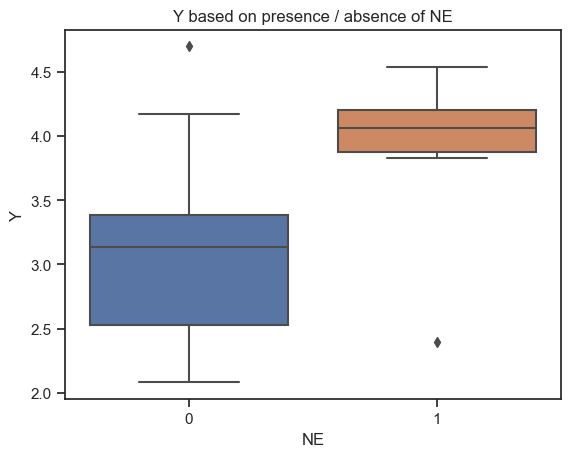

In [378]:
#TODO : rename
sns.boxplot(x='NE', y='Y', data=df)
plt.xlabel('NE')
plt.ylabel('Y')
plt.title('Y based on presence / absence of NE')
plt.show()

In [ ]:
sns.boxplot(x='MW', y='Y', data=df)
plt.xlabel('MW')
plt.ylabel('y')
plt.title('Boxplots of y based on MW')
plt.show()

In [ ]:
sns.boxplot(x='W', y='Y', data=df)
plt.xlabel('W')
plt.ylabel('y')
plt.title('Boxplots of y based on W')
plt.show()

In [ ]:
sns.boxplot(x='S', y='Y', data=df)
plt.xlabel('S')
plt.ylabel('y')
plt.title('Boxplots of y based on S')
plt.show()

In [ ]:
# Interaction Term CODE

# above scatterplot shows strong correlation between X2/X3, X1/X6, X1/X2, X1/X3?
# add interactions? 
# should be looking at X1 / X4, X5, X6, X2/X3, X5/X6


# df['X2:X3'] = df['X2'] * df['X3']
# df['X1:X6'] = df['X1'] * df['X6']
# df['X1:X4'] = df['X1'] * df['X4']
# df['X1:X5'] = df['X1'] * df['X5']
# df['X5:X6'] = df['X5'] * df['X6']
# df['X1:NE'] = df['X1'] * df['NE']
# df['X5:NE'] = df['X5'] * df['NE']
# df['X6:NE'] = df['X6'] * df['NE']



# X = df.drop(columns=['Y', 'Cities', 'Region', 'S', 'MW', 'W'])

interaction_model = fit_lm(X, y)




                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     10.40
Date:                Thu, 07 Mar 2024   Prob (F-statistic):           2.69e-07
Time:                        10:36:33   Log-Likelihood:                -156.38
No. Observations:                  41   AIC:                             334.8
Df Residuals:                      30   BIC:                             353.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         58.3683     46.985      1.242      0.2

In [379]:
# stepwise regression



# Perform stepwise regression
def stepwise_selection(X, y, 
                        initial_list=[], 
                        threshold_in=0.01, 
                        threshold_out = 0.05, 
                        verbose=True):
    included = list(initial_list)
    print(X.columns)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included



In [385]:

no_interaction = stepwise_selection(X, y)
# result = stepwise_selection(X, y)

# Print selected features
print("Selected features:", no_interaction)
# print("Selected features:", result)

# stepwise_interaction_optimal = X[result]
no_interaction_stepwise_opt = X[no_interaction]

# interaction_model_stepwise = fit_lm(stepwise_interaction_optimal, y)
no_interaction_model_stepwise = fit_lm(no_interaction_stepwise_opt, y)


Index(['X1', 'X2', 'X4', 'NE'], dtype='object')
Add  X1                             with p-value 0.000218785
Add  X2                             with p-value 0.00264179
Selected features: ['X1', 'X2']
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.420
Method:                 Least Squares   F-statistic:                     15.47
Date:                Thu, 14 Mar 2024   Prob (F-statistic):           1.22e-05
Time:                        12:28:37   Log-Likelihood:                -30.970
No. Observations:                  41   AIC:                             67.94
Df Residuals:                      38   BIC:                             73.08
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
         

In [366]:
def backward_elimination(X, y, significance_level=0.05):
    """
    Perform backward elimination to select significant features for the linear regression model.
    
    Parameters:
    X : DataFrame or array-like
        Input features.
    y : Series or array-like
        Target variable.
    significance_level : float, optional (default=0.05)
        The significance level used for feature elimination.
    
    Returns:
    selected_features : list
        List of selected features.
    model : Statsmodels regression model
        Final regression model after backward elimination.
    """
    # Step 1: Fit initial model
    X_with_const = sm.add_constant(X)
    model = sm.OLS(y, X_with_const).fit()
    num_features = X_with_const.shape[1]
    
    while True:
        # Step 2: Evaluate initial model
        # Step 3: Remove least significant variable
        p_values = model.pvalues.drop('const')
        least_significant_variable = p_values.idxmax()
        
        if p_values.max() < significance_level or num_features == 1:
            break
        
        X_with_const = X_with_const.drop(least_significant_variable, axis=1)
        model = sm.OLS(y, X_with_const).fit()
        num_features -= 1
    
    selected_features = X_with_const.columns.tolist()[1:]  # Exclude the constant term
    return selected_features, model


In [386]:

res, model = backward_elimination(X, y)

print("\n\n\nbackwards result", res)
print(model.summary())
print(model.summary2().tables[1])

# backwards_model = fit_lm(X[['X1', 'X2', 'X3', 'X4', 'X6', 'X1:X4', 'X1:X5', 'X5:X6']])

# ni_res, ni_model = backward_elimination(X, y)
# print(ni_res, ni_model.summary())







backwards result ['X1', 'X2', 'X4', 'NE']
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.605
Model:                            OLS   Adj. R-squared:                  0.561
Method:                 Least Squares   F-statistic:                     13.79
Date:                Thu, 14 Mar 2024   Prob (F-statistic):           6.47e-07
Time:                        12:28:43   Log-Likelihood:                -24.131
No. Observations:                  41   AIC:                             58.26
Df Residuals:                      36   BIC:                             66.83
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const  

In [382]:
def forward_stepwise_regression(X, y, significance_level=0.05):
    """
    Perform forward stepwise regression to select significant features for the linear regression model.

    Parameters:
    X : DataFrame or array-like
        Input features.
    y : Series or array-like
        Target variable.
    significance_level : float, optional (default=0.05)
        The significance level used for feature selection.

    Returns:
    selected_features : list
        List of selected features.
    model : Statsmodels regression model
        Final regression model after forward stepwise regression.
    """
    selected_features = []  # List to store selected features
    remaining_features = list(X.columns)  # List of remaining features

    # Step 1: Iterate through each feature
    while len(remaining_features) > 0:
        best_pvalue = float('inf')
        best_feature = None

        # Step 2: Try adding each remaining feature
        for feature in remaining_features:
            candidate_features = selected_features + [feature]
            X_subset = X[candidate_features]
            X_subset_with_const = sm.add_constant(X_subset)
            model = sm.OLS(y, X_subset_with_const).fit()

            # Step 3: Evaluate model and select the best feature
            p_value = model.pvalues[feature]
            if p_value < best_pvalue:
                best_pvalue = p_value
                best_feature = feature

        # Step 4: Add the best feature to the selected features list
        if best_pvalue < significance_level:
            selected_features.append(best_feature)
            remaining_features.remove(best_feature)
        else:
            break

    # Step 5: Fit the final model using selected features
    X_final_subset = X[selected_features]
    X_final_subset_with_const = sm.add_constant(X_final_subset)
    final_model = sm.OLS(y, X_final_subset_with_const).fit()

    return selected_features, final_model


In [387]:

print(X.columns)
res, model = forward_stepwise_regression(X, y)
print(res)

# ni_fres, ni_fmodel = forward_stepwise_regression(X.drop(columns=['X1:NE', 'X5:NE', 'X6:NE']), y)
# print(ni_fres, ni_fmodel.summary())

Index(['X1', 'X2', 'X4', 'NE'], dtype='object')
['X1', 'X2', 'X4', 'NE']


In [389]:
# final interaction attempt

X_ne_int = X.copy()
X_ne_int['X1:NE'] = X_ne_int['X1'] * X_ne_int['NE']
X_ne_int['X2:NE'] = X_ne_int['X2'] * X_ne_int['NE']
X_ne_int['X4:NE'] = X_ne_int['X4'] * X_ne_int['NE']
# X_ne_int['X5:NE'] = X_ne_int['X5'] * X_ne_int['NE']



In [390]:

neint_bw_res, neint_bw_model = backward_elimination(X_ne_int, y)
print(neint_bw_res, neint_bw_model.summary())
#['X2', 'X6', 'X1:NE', 'X2:NE', 'X6:NE']

# required_neint_model = X_ne_int[['X1', 'X2', 'X6', 'X1:NE', 'X2:NE', 'X6:NE', 'NE']]

# fit_lm(required_neint_model, y)



['X1', 'X2', 'X4', 'NE', 'X1:NE', 'X2:NE']                             OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     13.26
Date:                Thu, 14 Mar 2024   Prob (F-statistic):           1.10e-07
Time:                        12:29:09   Log-Likelihood:                -18.458
No. Observations:                  41   AIC:                             50.92
Df Residuals:                      34   BIC:                             62.91
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const    

In [391]:

neint_fw_res, neint_fw_model = forward_stepwise_regression(X_ne_int, y)
print(neint_fw_res, neint_fw_model.summary())
#['X2', 'X5:NE', 'X4:NE', 'X6']



['X1', 'X2', 'X4', 'X1:NE']                             OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.565
Method:                 Least Squares   F-statistic:                     13.97
Date:                Thu, 14 Mar 2024   Prob (F-statistic):           5.67e-07
Time:                        12:29:40   Log-Likelihood:                -23.975
No. Observations:                  41   AIC:                             57.95
Df Residuals:                      36   BIC:                             66.52
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9484   

In [392]:

ne_int_stepwise = stepwise_selection(X_ne_int, y)
print(ne_int_stepwise)
fit_lm(X_ne_int[ne_int_stepwise], y)

Index(['X1', 'X2', 'X4', 'NE', 'X1:NE', 'X2:NE', 'X4:NE'], dtype='object')
Add  X1                             with p-value 0.000218785
Add  X2                             with p-value 0.00264179
['X1', 'X2']
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.420
Method:                 Least Squares   F-statistic:                     15.47
Date:                Thu, 14 Mar 2024   Prob (F-statistic):           1.22e-05
Time:                        12:29:51   Log-Likelihood:                -30.970
No. Observations:                  41   AIC:                             67.94
Df Residuals:                      38   BIC:                             73.08
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
 

In [393]:
# Upon removal of X3 from the model, all variable selection algs converge on X2, NE when there are no interaction terms present
# now we must add interaction terms and find best model with them!


# define all interaction terms
# all from X1 to NW by one another
# surely this doesn't need to be done manually

poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)


X_interactions = poly.fit_transform(X)

interaction_feature_names = poly.get_feature_names_out(X.columns)

interactions_df = pd.DataFrame(X_interactions, columns=interaction_feature_names)

interactions_df.head()


,X1,X2,X4,NE,X1 X2,X1 X4,X1 NE,X2 X4,X2 NE,X4 NE
0,70.3,213.0,6.0,0.0,14973.9,421.80,0.0,1278.0,0.0,0.0
1,61.0,91.0,8.2,0.0,5551.0,500.20,0.0,746.2,0.0,0.0
2,56.7,453.0,8.7,0.0,25685.1,493.29,0.0,3941.1,0.0,0.0
3,51.9,454.0,9.0,0.0,23562.6,467.10,0.0,4086.0,0.0,0.0
4,49.1,412.0,9.0,1.0,20229.2,441.90,49.1,3708.0,412.0,9.0


In [394]:

int_bw_res, int_bw_model = backward_elimination(interactions_df, y)
print(int_bw_res, int_bw_model.summary(), sep='\n')


int_fw_res, int_fw_model = forward_stepwise_regression(interactions_df, y)
print(int_fw_res, int_fw_model.summary(), sep='\n')
# print(int_fw_model.summary())

# X2, X6, X5*, X4*, NE, 'X2 X6', 'X5 NE', 'X4 NE', 'X2 NE'

# req_model = interactions_df[['X2', 'X6', 'X5', 'X4', 'NE', 'X2 X6', 'X5 NE', 'X4 NE', 'X2 NE']]
# fit_lm(req_model, y)
int_stepwise = stepwise_selection(interactions_df, y)
# result = stepwise_selection(X, y)

# Print selected features
print("Selected features:", int_stepwise)
# print("Selected features:", result)

# stepwise_interaction_optimal = X[result]
int_stepwise_opt = interactions_df[int_stepwise]

# interaction_model_stepwise = fit_lm(stepwise_interaction_optimal, y)
int_stepwise_model = fit_lm(int_stepwise_opt, y)

# converges on X2X6, X5NE -> X2, X5, X6, NE

# int_stepwise_req_model = interactions_df[['X2', 'X5', 'X6', 'X2 X6', 'X5 NE', 'X4 NE', 'X2 NE']]
# fit_lm(int_stepwise_req_model, y)


['X1', 'X2', 'X4', 'NE', 'X1 NE', 'X2 NE']
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     13.26
Date:                Thu, 14 Mar 2024   Prob (F-statistic):           1.10e-07
Time:                        12:29:58   Log-Likelihood:                -18.458
No. Observations:                  41   AIC:                             50.92
Df Residuals:                      34   BIC:                             62.91
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const    

In [ ]:

final_model = fit_lm(X[['X2', 'X3', 'NE', 'X6:NE']], y)

def plot_resid(residuals):
    fig, ax = plt.subplots(figsize=(6, 6))
    sm.qqplot(residuals, line='s', ax=ax)
    plt.show()

plot_resid(final_model.resid)



In [ ]:
residuals = final_model.resid
fitted = final_model.fittedvalues

# Get influence statistics
influence = final_model.get_influence()
leverage = influence.hat_matrix_diag
standardized_residuals = influence.resid_studentized_internal

# Create the 2x2 plot grid
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Residuals vs Fitted plot
axes[0, 0].scatter(fitted, residuals)
axes[0, 0].set_xlabel('Fitted values')
axes[0, 0].set_ylabel('Residuals')
axes[0, 0].set_title('Residuals vs Fitted')

# QQ plot of residuals
sm.qqplot(standardized_residuals, line='45', ax=axes[0, 1])
axes[0, 1].set_title('Normal Q-Q')

# Scale-Location plot
axes[1, 0].scatter(fitted, np.sqrt(np.abs(standardized_residuals)))
axes[1, 0].set_xlabel('Fitted values')
axes[1, 0].set_ylabel('Square root of standardized residuals')
axes[1, 0].set_title('Scale-Location')

# Residuals vs Leverage plot
axes[1, 1].scatter(leverage, standardized_residuals)
axes[1, 1].set_xlabel('Leverage')
axes[1, 1].set_ylabel('Standardized residuals')
axes[1, 1].set_title('Residuals vs Leverage')

plt.tight_layout()
plt.show()

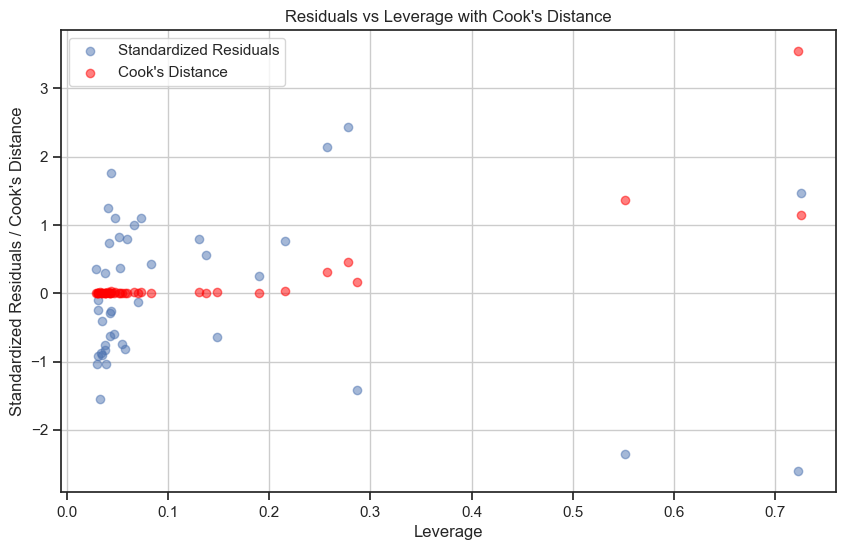

In [ ]:
cooks_d = influence.cooks_distance[0]

# Create the plot
plt.figure(figsize=(10, 6))
plt.scatter(leverage, standardized_residuals, alpha=0.5, label='Standardized Residuals')
plt.scatter(leverage, cooks_d, alpha=0.5, color='red', label="Cook's Distance")
plt.xlabel('Leverage')
plt.ylabel('Standardized Residuals / Cook\'s Distance')
plt.title('Residuals vs Leverage with Cook\'s Distance')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# sns.lmplot(x='X1:X4', y='Y', data=df, ci=None)

# # Customize plot
# plt.title('Interaction Plot for Continuous Variables')
# plt.xlabel('Interaction Term (X1 * X4)')
# plt.ylabel('Outcome Variable (Y)')

# # Show plot
# plt.show()


fig, axes = plt.subplots(1, 6, figsize=(20, 4))

# Plot each interaction term in a separate subplot
for i, col in enumerate(['X2:X3', 'X1:X6', 'X1:X4', 'X1:X5','X5:X6', 'X1:X3']):
    ax = axes[i]
    sns.regplot(x=col, y='Y', data=df, ax=ax)
    ax.set_xlabel(col, fontsize=20)
    ax.set_ylabel('Y', fontsize=20)

# Adjust layout
plt.tight_layout()


# Show plot
plt.show()

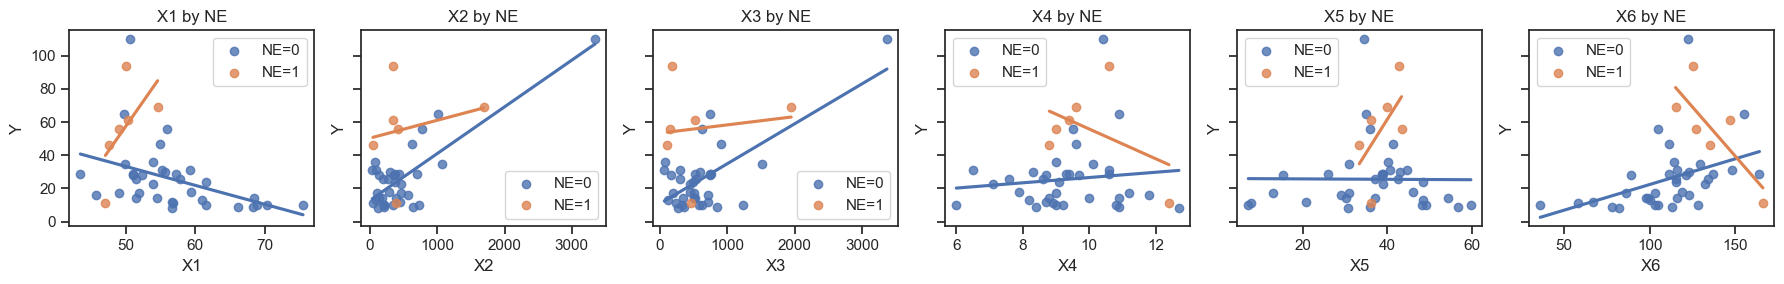

In [ ]:
fig, axes = plt.subplots(1, 6, figsize=(18, 3), sharey=True)

# Loop through each continuous variable and create scatterplot with regression line for each value of 'NE'
for i, col in enumerate(['X1', 'X2', 'X3', 'X4', 'X5', 'X6']):
    for ne_val, ne_group in df.groupby('NE'):
        sns.regplot(x=col, y='Y', data=ne_group, ax=axes[i], ci=None, label=f'NE={ne_val}')
    axes[i].set_title(col + ' by NE')
    axes[i].legend()

plt.tight_layout()
plt.show()

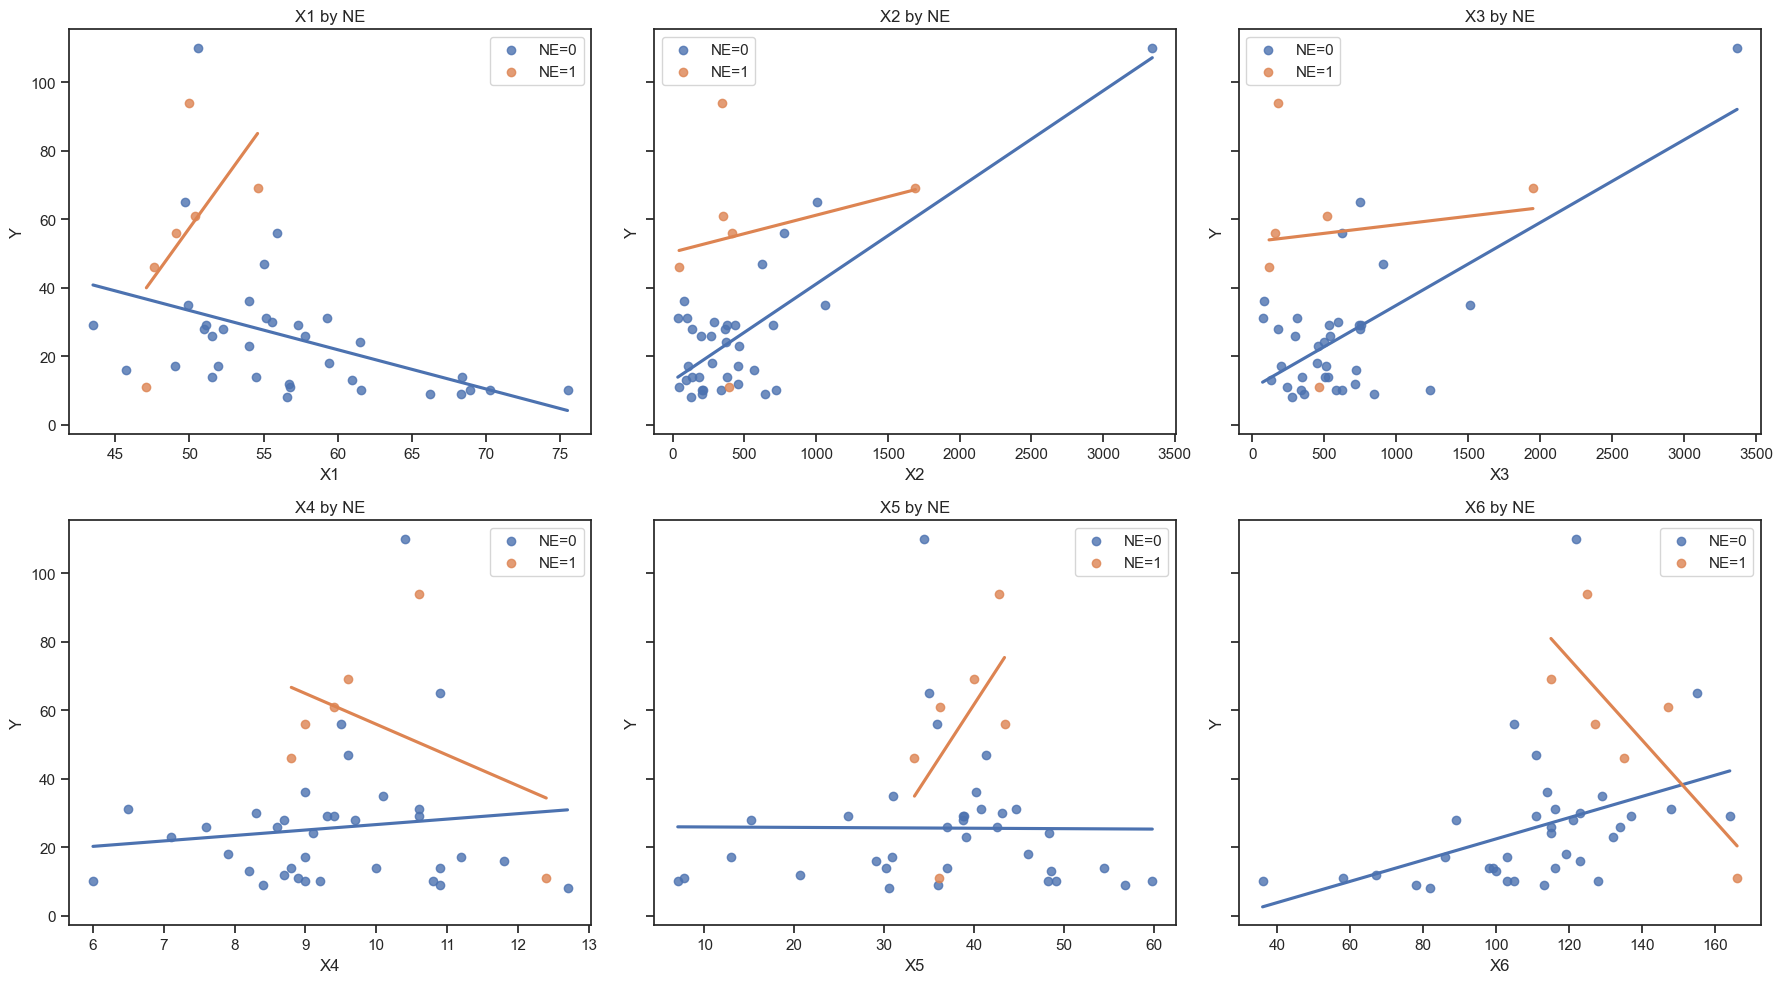

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10), sharey=True)

for i, col_name in enumerate(['X1', 'X2', 'X3', 'X4', 'X5', 'X6']):
    row = i // 3  # Determine the row index
    col = i % 3   # Determine the column index
    for ne_val, ne_group in df.groupby('NE'):
        sns.regplot(x=col_name, y='Y', data=ne_group, ax=axes[row, col], ci=None, label=f'NE={ne_val}')
    axes[row, col].set_title(col_name + ' by NE')
    axes[row, col].legend()

plt.tight_layout()
plt.show()